# House Prices

문제정의: SalePrice를 종속변수로 두고 다양한 독립변수 간의 관계를 이해 목표

1) 문제 이해: 각각의 변수를 살펴보고, 문제에 대한 변수가 가지는 의미와 중요성 분석

2) 종속 변수 탐색: 종속변수인 SalePrice 탐색 및 분석

3) 다변량 연구: 종속변수와 독립변수의 관계 분석

4) 데이터 전처리: 데이터 집합을 정리하고 누락된 데이터, 특이치, 범주형 변수 처리하며 가정을 검정

5) 가설 검증

In [1]:
# data preprocessing
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warining
import warnings
warnings.filterwarnings('ignore')

#modeling
from sklearn.preprocessing import LabelEncoder

In [2]:
train= pd.read_csv('C:/jupyter_project/Boston house price prediction/train.csv')
test= pd.read_csv('C:/jupyter_project/Boston house price prediction/test.csv')

# 1) 문제 이해

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# SalePrice 변수는 없음 
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- SalePrice : 집값. 예측하고자 하는 변수
- MSSubClass: 건축계급
- MSZoning: 일반 구역 구분
- LotFrontage: 건물에 연결된 거리의 선형 피트
- LotArea: 평방 피트 단위의 로트 크기
- Street: 도로 접근 유형
- Alley: 골목길 접근 유형
- LotShape: 재산의 일반형상
- LandContour: 속성의 평탄도
- Utilities: 사용 가능한 유틸리티 유형
- LotConfig: 로트 구성
- LandSlope: 재산의 경사
- Neighborhood: Ames 시 경계 내 물리적 위치
- Condition1: 간선도로 또는 철도와의 근접성
- Condition2: 간선도로 또는 철도와의 근접성
- BldgType: 주거 유형
- HouseStyle: 주거 스타일
- OverallQual: 전체 재료 및 마감 품질
- OverallCond: 전반적인 상태 등급
- YearBuilt: 원래 시공 날짜
- YearRemodAdd: 리모델링 날짜
- RoofStyle: 지붕의 종류
- RoofMatl: 지붕 재료
- Exterior1st: 집 외피
- Exterior2nd: 집 외피(자재가 둘 이상일 경우)
- MasVnrType: 제곱 피트의 벽돌 베니어 타입
- MasVnrArea: 제곱 피트의 벽돌 베니어 면적
- ExterQual: 외부 소재 품질
- ExterCond: 외관
- Foundation: Type of foundation
- BsmtQual: 지하실 높이
- BsmtCond: 지하실의 일반상태
- BsmtExposure: 워크아웃 또는 정원 수준의 지하 벽
- BsmtFinType1: 지하 마감 면적 품질
- BsmtFinSF1: 타입 1 마감 평방피트
- BsmtFinType2: 두 번째 마감 영역의 품질(있는 경우)
- BsmtFinSF2: 타입 2 완제품 평방피트
- BsmtUnfSF: 지하실의 미완성 평방피트
- TotalBsmtSF: 지하실의 총 평방피트
- Heating: 난방 유형
- HeatingQC: 난방 품질 및 상태
- CentralAir: 중앙 에어컨
- Electrical: 전기 시스템
- 1stFlrSF:1층 평방 피트
- 2ndFlrSF: 2층 평방 피트
- LowQualFinSF: 저품질 마감 사각피트(모든 층)
- GrLivArea: 생활 면적 평방 피트
- BsmtFullBath:지하 전체 욕실
- BsmtHalfBath: 지하 반쪽 욕실
- FullBath: 등급 이상의 전체 욕실
- HalfBath: 반신욕
- Bedroom: 지하층 이상 침실 수
- Kitchen: 주방수
- KitchenQual: 키친 퀄리티
- TotRmsAbvGrd: 총 객실 등급 이상(화장실 포함 안 함)
- Functional: 홈 기능 등급
- Fireplaces: 벽난로 수
- FireplaceQu:벽난로 품질
- GarageType: Garage 위치
- GarageYrBlt: Year Charage가 지어졌다.
- GarageFinish: 차고 내부 마감
- GarageCars: 자동차 용량의 차고 크기
- GarageArea: 평방 피트의 차고 크기
- GarageQuality: 차고 품질
- GarageCond: 차고 상태
- PavedDrive: 포장된 진입로
- WoodDeckSF: 평방피트의 목재 데크 면적
- OpenPorchSF: 정사각형 피트의 열린 현관
- EnclosedPorch: 정사각형 피트로 둘러싸인 현관 구역
- 3SsnPorch: T3계절 베란다 면적(평방피트)
- ScreenPorch: 스크린 베란다 영역(평방피트)
- PoolArea: 평방 피트의 풀 영역
- PoolQC:  풀 품질
- Fence:  울타리 품질
- MiscFeature:  기타 범주에 포함되지 않은 기타 기능
- MiscVal: 기타 기능의 $값
- MoSold: 판매 월
- YrSold:  판매 연도
- SaleType: 판매 유형
- SaleCondition: 판매 조건

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


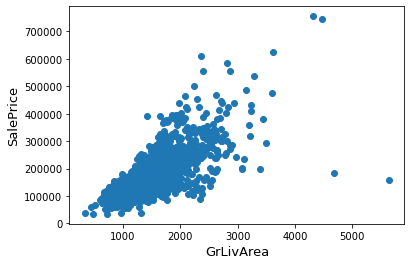

In [9]:
# 생활 면적 평방 피트 당 가격

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [10]:
# 이상치 제거
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

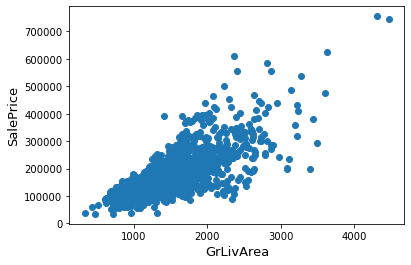

In [11]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [12]:
# 최저 가격이 0보다 크다. 모델에 영향을 줄 만한 특성은 보이지 않는다. 

train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 2) 데이터 탐색

In [13]:
# 변수 간의 상관관계 확인

cor = train.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_fe

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

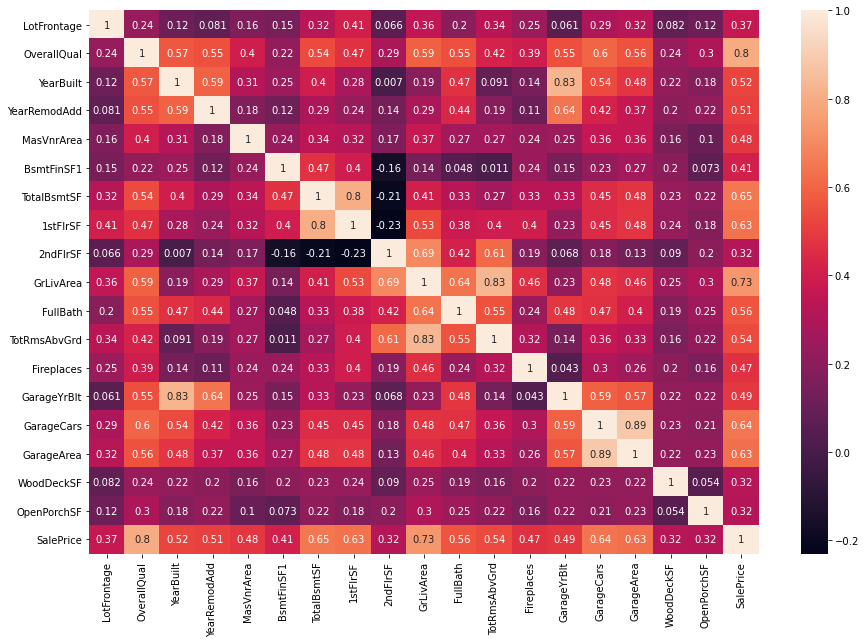

In [14]:
# 위에서 뽑은 상관관계 있는 변수만 뽑아서 다시 확인
# 옆은 부분이 상관관계가 높은 것으로 두 변수 간에 상관관계가 너무 강하면 다중 공선성 상황이 나타날 수 있다. 

plt.figure(figsize=(15,10))
sns.heatmap(train[cor_fe].corr(),annot=True)

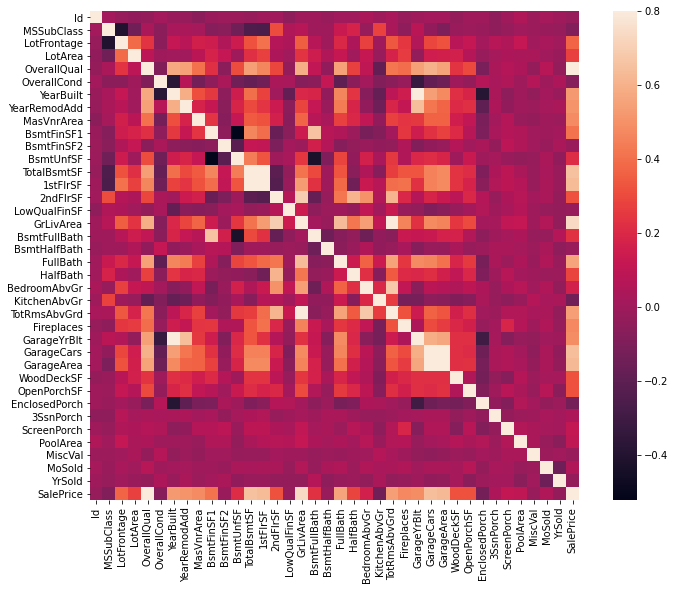

In [18]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

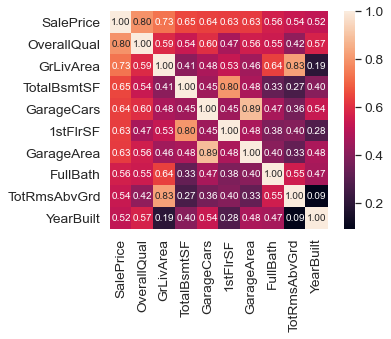

In [19]:
#이 중에서 salesprice와 상관관계 높은 변수 뽑아서 산점도 확인
#numpy.corrcoef() 함수: 피어슨 상관계수 계산

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

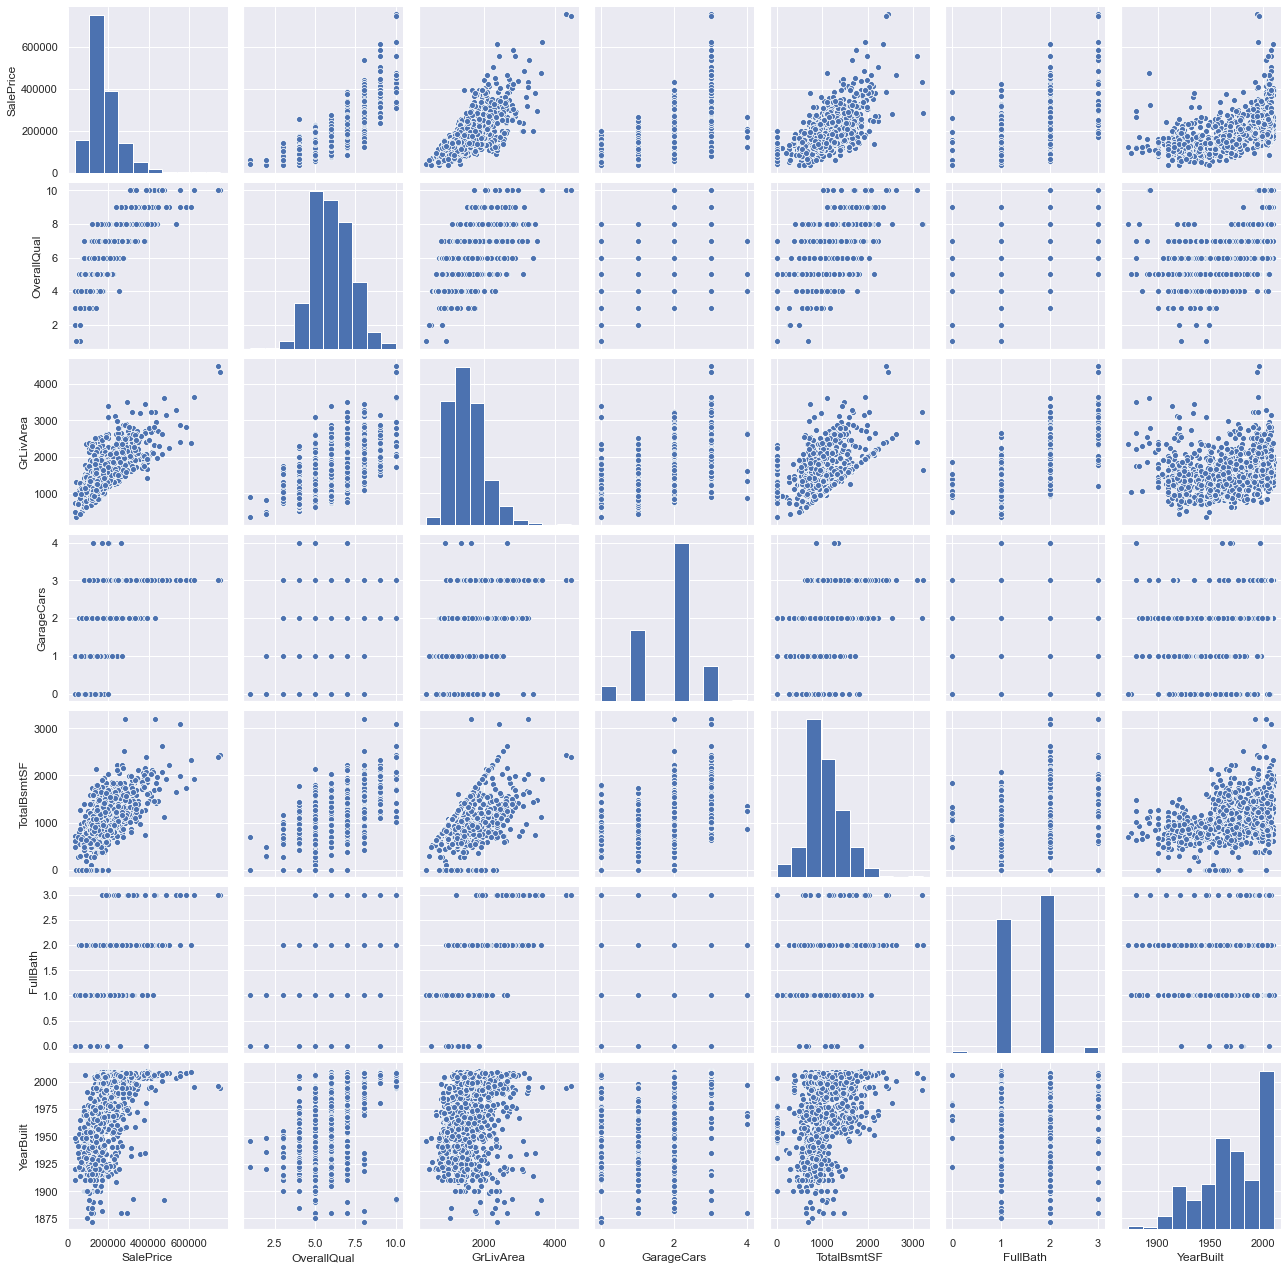

In [20]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### 요약

1. 'GrlivArea' 및 'TotalBsmtSF'(지하실의 총 평방피트)는 'SalesPrice'와 선형적으로 연관되어 있다. 
두 관계 모두 양성이므로 한 변수가 증가하면 다른 변수도 증가한다.
특히 'TotalBsmtSF'와 'SalePrice' 선형관계의 기울기가 특히 길다. 


2. 'OverallQuality'와 'YearBuilt'도 'SalePrice'와 관련이 있는 것으로 보인다. 
    박스 플롯이 전체 품질과 함께 판매 가격이 어떻게 상승하는지를 보여주는 'OverallQuality'의 경우 관계가 더 돈독해 보인다.

In [21]:
# 데이터 합치기

fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))

In [22]:
print(train.shape, test.shape, df.shape)

(1458, 81) (1459, 80) (2917, 80)


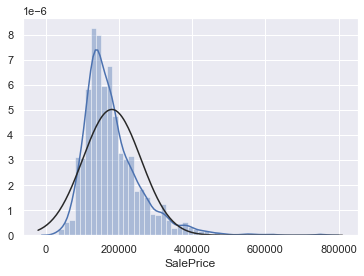

In [23]:
#타겟변수 확인
sns.distplot(train['SalePrice'],fit = norm)

### 종속변수 시각화 결과

1. 정규 분포에서 벗어남.

2. 눈에 띄는 양의 왜도를 가지고 있음.

3. 정점을 보이다.

In [24]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


### Skewness

데이터의 분포가 한쪽으로 쏠린 것을 의미하는 Skewness는 positive Skewness와 Negative Skewness로 나뉜다. 
Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은) 형태이고, Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태이다. 
일반적으로 고려 가능한 Un-Skew 수치는 +2~-2 사이이다. (George & Mallery, 2010). George, D., & Mallery, M. (2010).
즉, Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터라고 볼 수 있다.
-2 미만은 Negative Skew, +2 초과는 Positive Skew.

#### skewed 데이터라면?

Skewed 데이터를 변환해야 한다. 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다. Skewed 되어있는 값을 그대로 학습시키면 꼬리 부분이 상대적으로 적고 멀어서 모델에 영향이 거의 없이 학습된다. 만약 꼬리 부분도 노이즈가 아닌 정말 유의미한 데이터이면 꼬리 부분에 해당하는 test 데이터는 예측력이 낮아진다.
변환을 해서 들어가게 되면 그만큼 데이터의 중간값(or 평균값)가 꼬리족 데이터와 가까워져서 모델에 보다 크게 들어간다. 그렇게 되면 꼬리 쪽에 해당하는 test 데이터가 들어와도 예측력이 높아진다.

### skewed 데이터 변환 방법
Skew 데이터를 변환하는 방법으론 square root, cube root, log, outlier 제거 등이 있다.
Log를 취해주게 되면 큰 숫자를 같은 비율의 작은 숫자로 만들어주며, 첨도와 왜도가 줄어들면서 정규성이 높아진다.이는 분석의 정확도를 더 높일 수 있는 결과를 가져온다.

- Positive skewed(right skewed) 변환방법 : square root, cube, log-> 밑이 10인 상용로그

- Negative skewed(left skewed) 변환방법 : square, cube root, logarithmic -> 밑이 2인 로그

### Kurtosis(첨도)

Kurtosis(첨도)는 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것이라고 할 수 있다.

한쪽 꼬리 부분의 극 값과 다른 쪽 꼬리의 극 값 간의 차이를 보여준다. 그렇기 때문에 아웃라이어를 찾을 때 사용된다. 첨도가 높으면(Kurtosis > 3) 아웃라이어가 많이 있다. 첨도가 낮으면(Kurtosis < 3) 극값이 정규 분포의 값보다 작기 때문에 결과에 대한 확인을 해봐야 한다. 

선형 회귀에서 독립변수와 종속변수에 대한 정규성 가정은 데이터가 많으면 중심극한정리로 인해서 문제가 되지 않으나, 잔차에 대한 분포가 정규성을 만족해야 하므로 변환한다 (잔차에 대한 분포가 정규성을 안띄면 모델의 성능이 좋지 않을 가능성이 높다.)


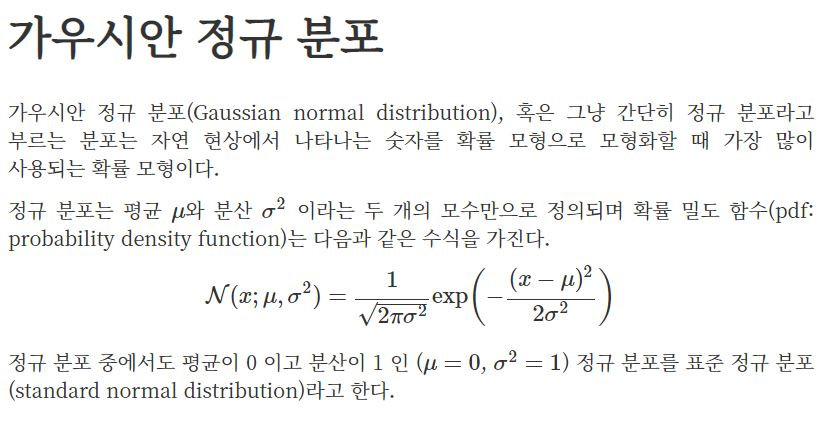

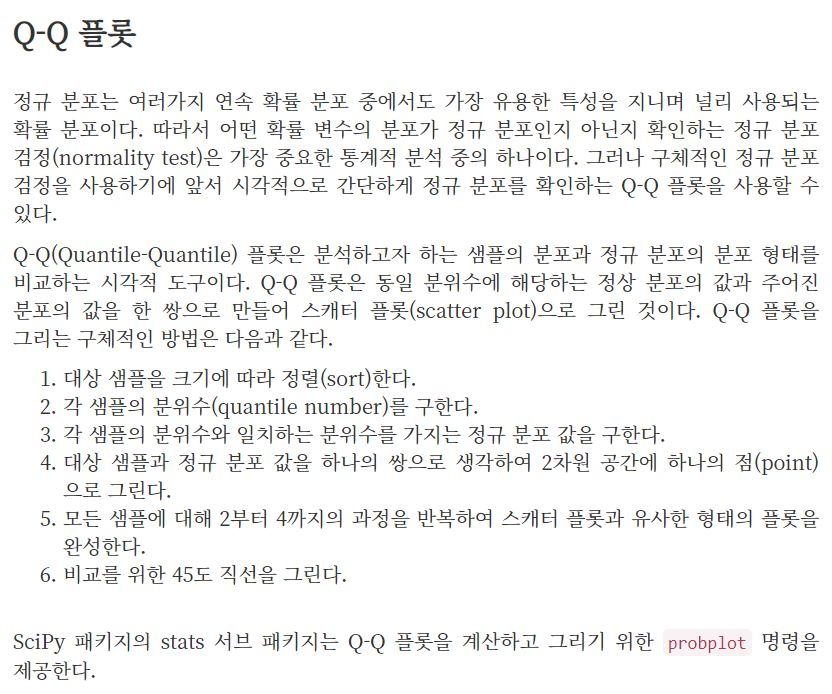

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

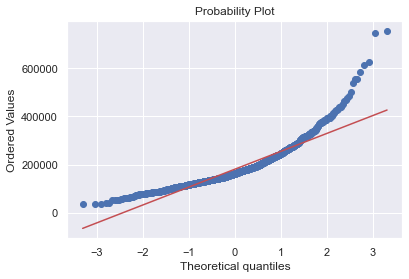

In [25]:
# 타겟 변수인 SalePrice의 왜도 확인 결과 왼쪽으로 치우쳐 있었으며 정규성을 띄지 않아 보였다.
# qq 플롯을 그려보니 정규성을 띄지 않음.

stats.probplot(train['SalePrice'], plot=plt)

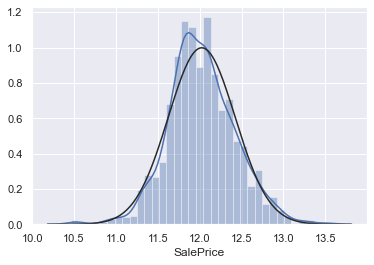

In [26]:
# 로그 변환. 통계 용어로 멱변환이라기도 하고 박스칵스 변환으로 람다를 사용하지 않고 로그를 취하였다. 
# 박스-칵스 변환의 주된 용도는 데이터를 정규분포에 가깝게 만들거나 데이터 분산을 안정화 하는 것으로 데이터 전처리에 유요하게 쓸 수 있다.

train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

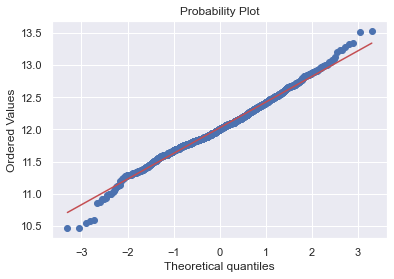

In [27]:
stats.probplot(train['SalePrice'], plot=plt)

# 3. 결측치 처리

1) 결측치 처리

누락된 데이터가 얼마나 보편적인지

결측 데이터가 랜덤인지 패턴을 가지고 있는지

=> 누락된 데이터는 표본 크기의 축소를 의미할 수 있다. 
우리가 분석을 진행하는 것을 방해할 수 있고
누락된 데이터를 처리할 때 편파적이지 않고 불편한 진실을 숨기지 않도록 해야 한다. 

In [28]:
target = train['SalePrice']

In [29]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


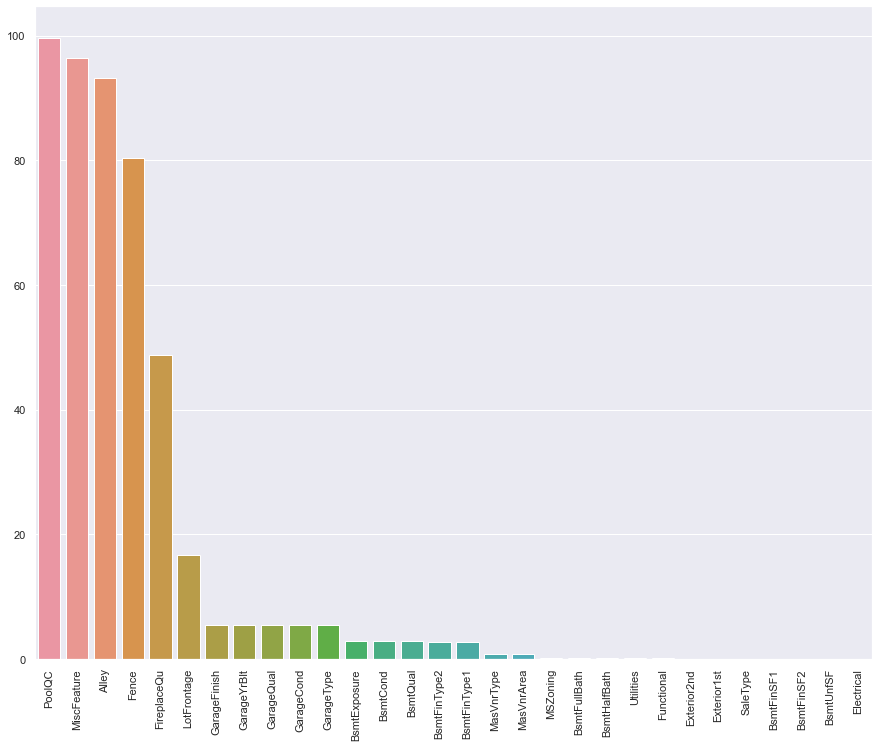

In [30]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

# 요약


1) PoolQC : 데이터의 NA는 풀이 없음을 의미합니다. 결측값의 비율이 99%로 매우 높고 대부분 주택에는 수영장이 없음을 감안할때 의미있는 변수이다.

2) MiscFeature : data description에 의하면 NA는 "no misc feature"로 기타기능 없음을 의미한다.

3) Alley : data description에 의하면 NA는 "no alley access"로 골목 접근 금지를 의미한다.

4) Fence : data description에 의하면NA는 "no fence"로 울타리가 없는 것을 의미한다.

5) FireplaceQu : data description에 의하면NA는 "no fireplace"로 난로가 없는 것을 의미한다.

In [31]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [32]:
# LotFrontage : 주택건물에 연결된 각 거리의 면적이 주변의 다른 주택과 비슷한 지역일 가능성이 높기 때문에 이웃의 LotFrontage의 중앙값으로 결측치를 채운다.

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
# GarageType, GarageFinish, GarageQual and GarageCond : 누락된 데이터를 None값으로 대체합니다
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
    
# GarageYrBlt, GarageArea and GarageCars : 결측치를 0으로 대체합니다 (차고가 없는 것은 차고에 차가 없는 것을 의미하기 때문입니다.)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)


In [34]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :지하실이 없으면 결측값이 0 일 가능성이 높기 때문에 결측치를 0으로 대체합니다
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :이러한 모든 범주형 지하실 관련 기능에 대해 NaN은 지하실이 없음을 의미합니다.

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [35]:
# MasVnrArea and MasVnrType :NA는 아마도이 집들에 대한 고정 베니어가 없다는 것을 의미합니다. Area은 0을, Type은 없음을 채울 수 있습니다.

df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [36]:
# MSZoning (The general zoning classification) : 'RL'이 가장 일반적인 값입니다. 따라서 'RL'로 결 측값을 채울 수 있습니다
# # mode(): 이산(discrete) 또는 범주(nominal) 데이터의 단일 최빈값(mode) (가장 흔한 값)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [37]:
# Utilities : 이 범주 기능의 경우 하나의 "NoSeWa"및 2 NA를 제외한 모든 데이터는 "AllPub"입니다. 'NoSewa'가있는 집이 훈련 세트에 있으므로이 기능은 예측 모델링에 도움이되지 않습니다. 그러므로 변수를 제거해줍니다

df = df.drop(['Utilities'], axis=1)

In [38]:
# Functional : data description에 의하면 NA는 typical을 의미합니다

df["Functional"] = df["Functional"].fillna("Typ")

In [39]:
# Electrical : 하나의 NA 값이 있습니다. 이 기능은 대부분 'SBrkr'을 가지므로 결측값으로 설정할 수 있습니다.
    
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [40]:
# KitchenQual: 전기와 동일한 하나의 NA 값만으로 KitchenQual의 결 측값에 'TA'(가장 빈번)를 설정합니다.

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [41]:
# Exterior1st and Exterior2nd : 두변수 모두 Exterior 1 & 2 하나의 결측값만 가집니다. 따라서 가장 일반적인 문자로 대체할 것입니다.

df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [42]:
# SaleType : 가장 빈번한 데이터인 WD로 결측치를 대체합니다

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [43]:
# MSSubClass : Na는 건물 등급 없음을 의미합니다. 결측값을 None으로 대체 할 수 있습니다

df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [44]:
# 결측치 확인결과 결측값이 없는 것으로 판단

null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio


##### 현재로서는 이 값들 중 어떤 것도 특이치라고 생각하지 않겠지만, 7점대인 두 가지의 값에 주의해야 한다.

In [45]:
# 건물의 클래스인 MSSubClass,전반적인 조건 등급인 OverallCond,연 월의 변수인 YrSold와 MoSold 피처에 대해서 int가 아닌 범주화로 변형

#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [46]:
# 순서형과 명목형 데이터 분리

df_obj = df.select_dtypes(include='object')
df_obj.head( )

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,None,None,None,12,2008,WD,Normal


In [47]:
li_obj = list(df_obj.columns)

In [48]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,2001.0,2.0,608.0,0,42,0,0,0,0,0


In [49]:
li_num = list(df_num.columns)

In [50]:
# 나중에 모델링을 하기 위해서 범주형 변수들을 라벨인코딩
# 숫자로 다루기 위해서 여러 방법이 존재하며 라벨인코딩이 그 중 하나
# 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능을 제공

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(df[c].values)) 
    df[c] = lb.transform(list(df[c].values))

In [51]:
# 각 변수들의 합으로 Total 파생 변수를 생성

df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

In [52]:
# 각 피처가 풀장을 가지고 있다 없다를 기준으로 apply 함수를 적용시켜서 생성

df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

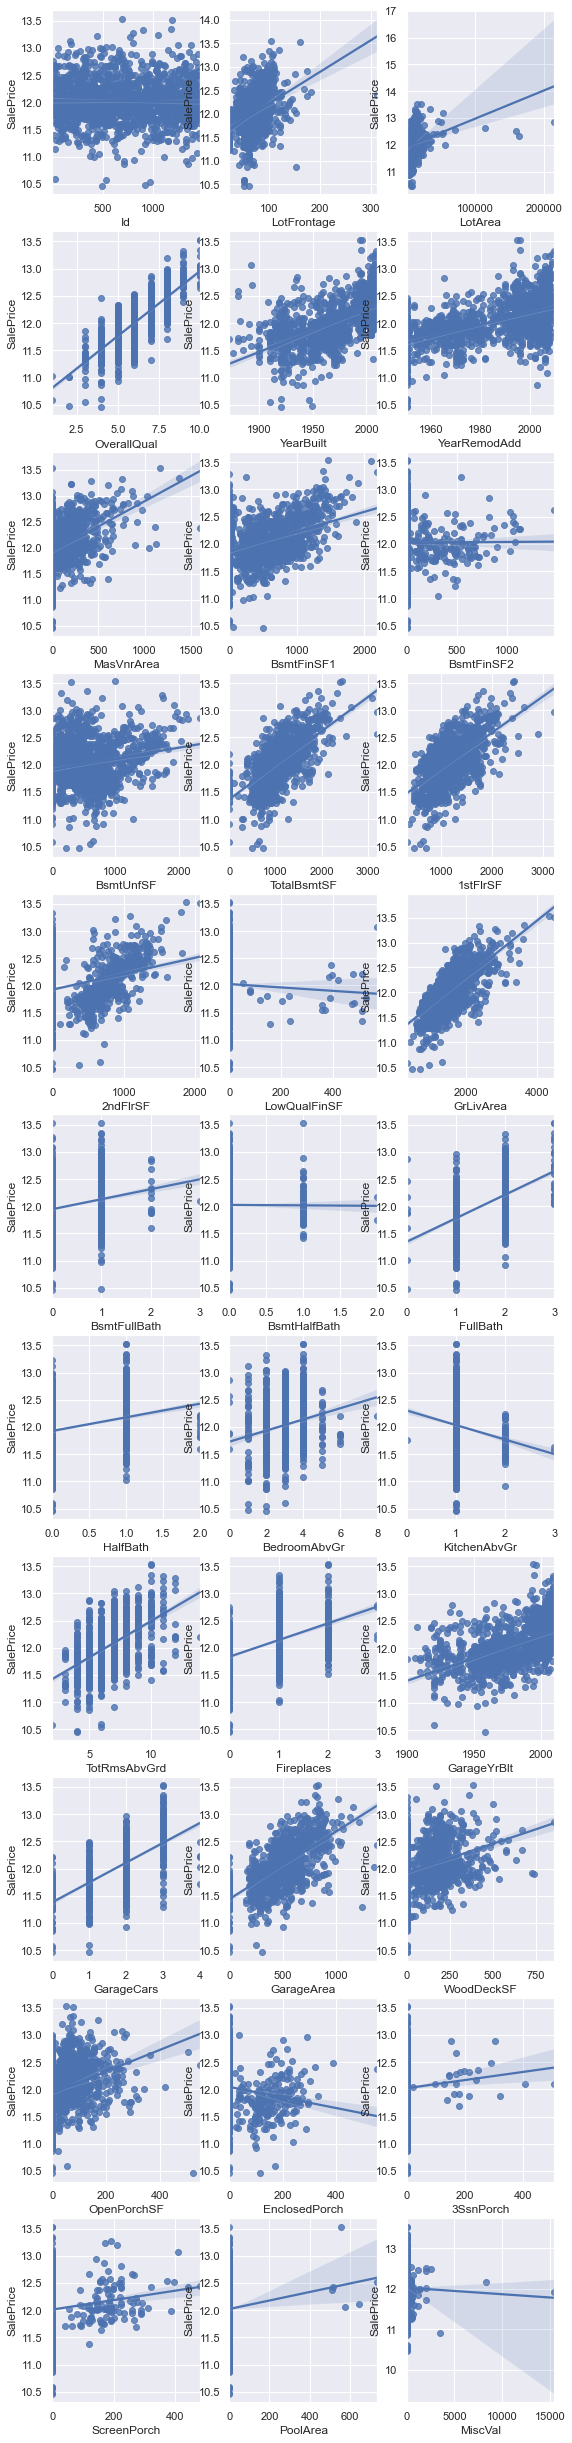

In [53]:
row = 11
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*3,row*4))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.regplot(df_train[li_num[i]],target , ax = axs[r][c])

In [55]:
# 상관성이 강한 변수들 따로 구분
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

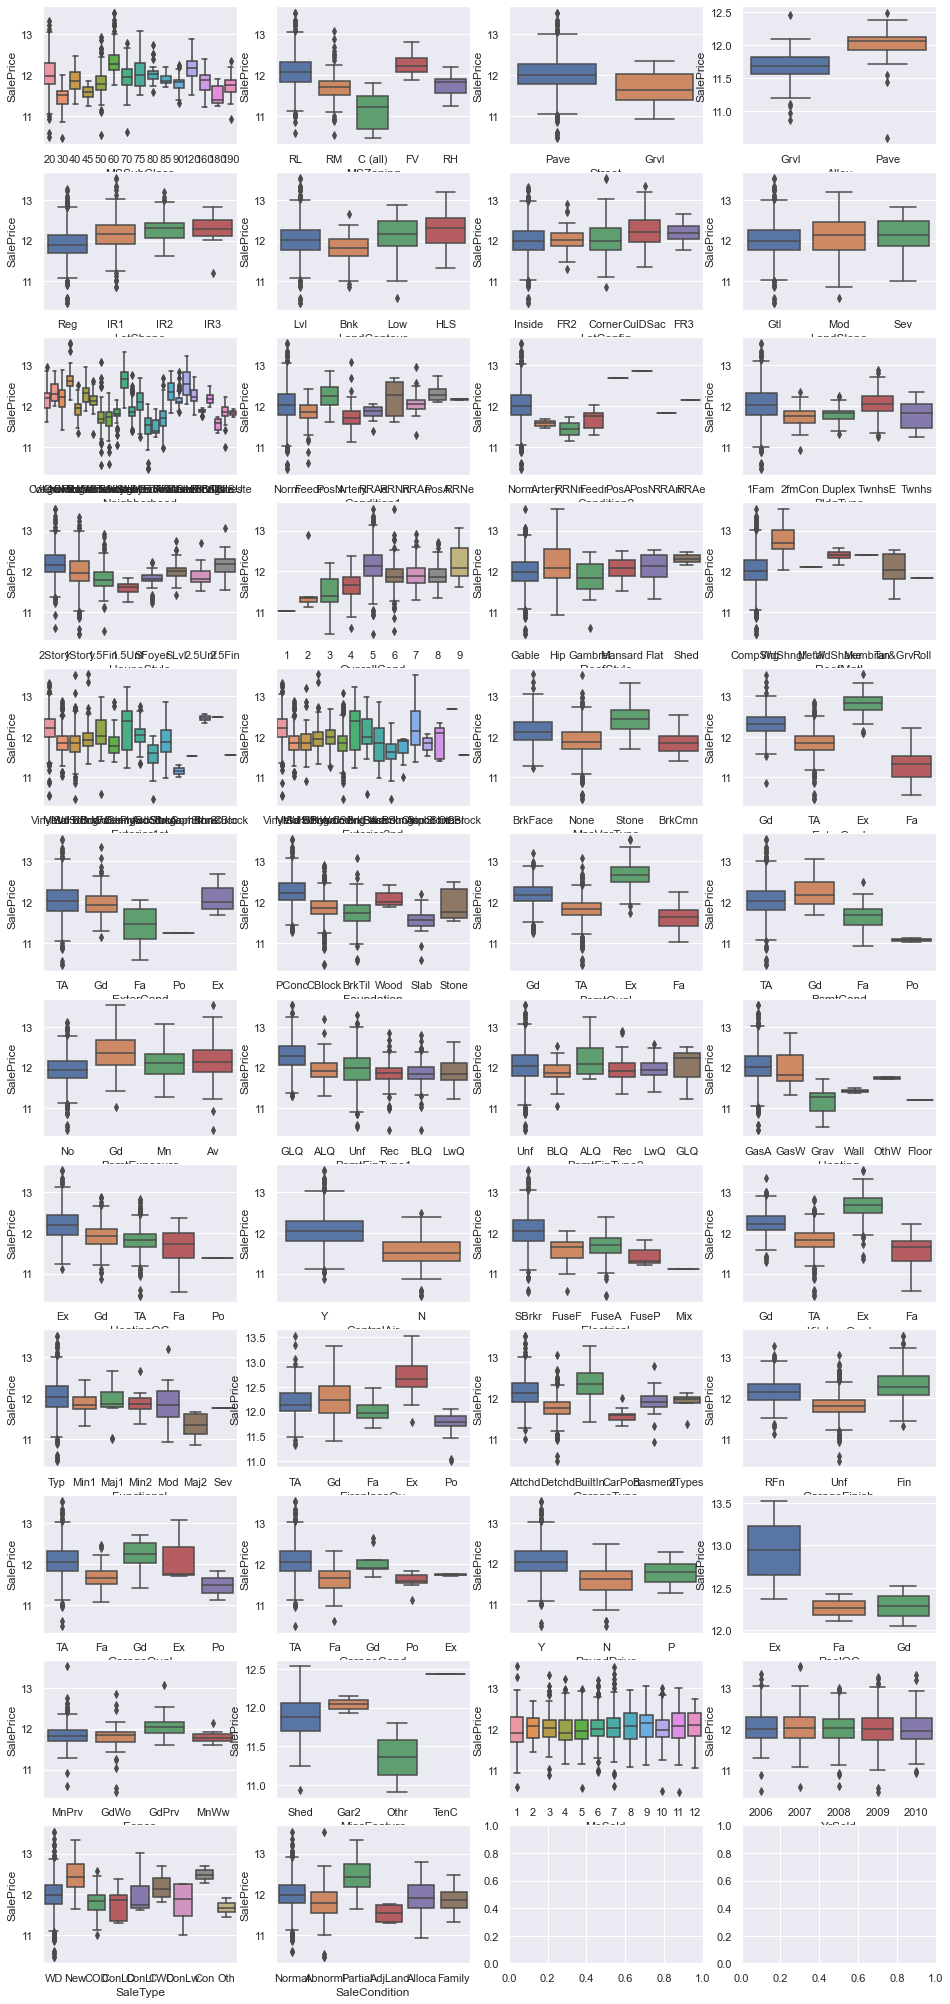

In [56]:
li_obj = list(df_obj.columns)
row = 12
col = 4 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_obj):
            sns.boxplot(train[li_obj[i]],target , ax = axs[r][c])

In [57]:
# 상관성이 강한 변수들 따로 구분
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

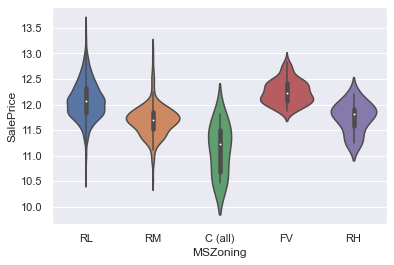

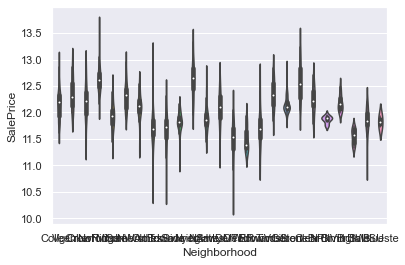

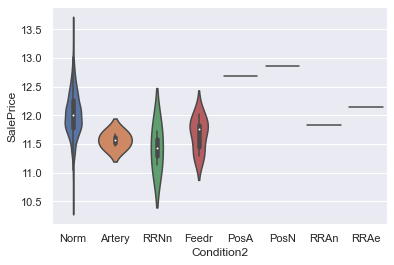

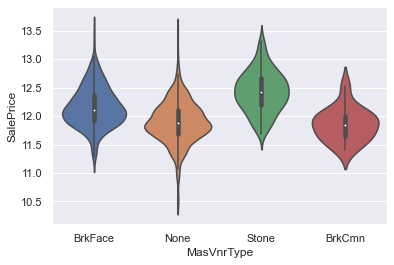

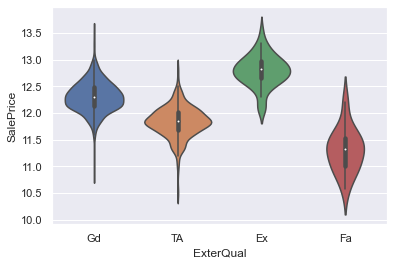

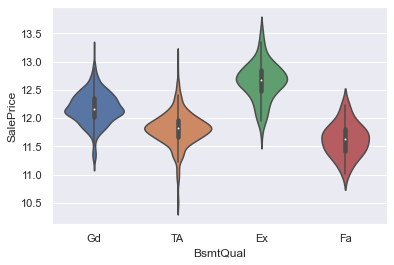

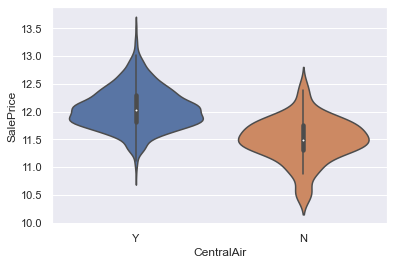

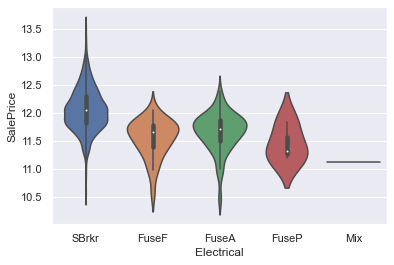

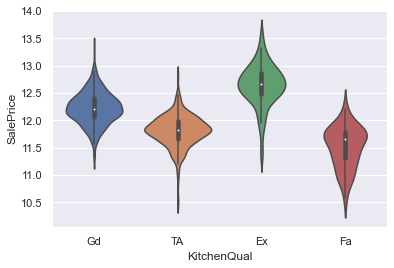

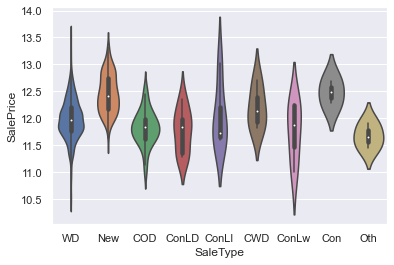

In [58]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

### box-cox 변환

비정상 확률 과정(nonstationary process)은 기댓값이나 분산이 시간에 따라 변화하는 확률 과정이다. 
주로 기댓값 분산의 크기가 시간이 지남에 따라 커지는 경우가 많다.
이와 반대로 시간이 지나도 기댓값이 분산이 변하지 않는 확률 과정을 정상 확률 과정(stationary process)라고 한다

비정상 확률 과정의 경우에는 정상 과정으로 변환(transform)하여 모형화하는 것이 효율적이므로 다음과 같은 방법을 사용하여 정상 과정 변환을 하게 된다.

1. 차분

2. 로그변환

비정상 확률 과정으로 모형화 할 수 있는 시계열 자료 중에서 표준편차가 자료의 크기에 비례하여 증가하는 경향을 보이거나 지수함수적으로 증가하는 경향을 보이는 경우에는 차분보다 로그 변환(logarithm transform)이 더 적당하다.

3. Box-Cox 변환¶

Box-Cox 변환은 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용된다.
모델 편향(model bias)과 거짓 교호작용: 회귀분석, 실험계획법 혹은 통계적 모델링을 수행할 경우, 치우친 분포는 모형에서 편향을 일으킬 수 있습니다.

표준 공정능력 분석을 수행할 경우, 기본 가정은 정규분포로 두기 때문에 이것 또한 공정능력 추정치를 편향되게 할 수 있습니다.  


그래서 정규분포가 아닌 경우 Box-Cox 변환을 수행합니다.


In [59]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [60]:
from scipy.stats import skew 
skewness = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [61]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index

In [62]:
print(high_skewness)
print(skew_feat)

MiscVal              21.939672
PoolArea             17.688664
haspool              15.494756
LotArea              13.109495
LowQualFinSF         12.084539
3SsnPorch            11.372080
LandSlope             4.973254
KitchenAbvGr          4.300550
BsmtFinSF2            4.144503
EnclosedPorch         4.002344
ScreenPorch           3.945101
BsmtHalfBath          3.929996
MasVnrArea            2.621719
OpenPorchSF           2.529358
WoodDeckSF            1.844792
Total_porch_sf        1.379521
1stFlrSF              1.257286
Total_sqr_footage     1.253666
LotFrontage           1.103039
GrLivArea             1.068750
TotalSF               1.009157
BsmtFinSF1            0.980645
BsmtUnfSF             0.919688
2ndFlrSF              0.861556
TotRmsAbvGrd          0.749232
Fireplaces            0.725278
HalfBath              0.696666
TotalBsmtSF           0.671751
BsmtFullBath          0.622415
OverallCond           0.569314
YearBuilt            -0.599194
GarageFinish         -0.609953
LotShape

In [63]:
# 절대값이 0.75 이상인 변수들만 채택하여 로그변환

df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0.0,0,...,6,5,1,5,2003.0,1,6,1,1,3
1,0,0,0,9600,0,0,0,1,0.0,0,...,6,5,1,5,1976.0,1,6,1,1,3
2,0,0,0,11250,0,0,0,1,0.0,0,...,6,5,1,5,2001.0,1,6,1,1,3


In [64]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

In [65]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0.0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.187527,0.730463,2.259674,0.730463,0.730463,1.540963
1,0.0,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.145138,0.730463,2.259674,0.730463,0.730463,1.540963
2,0.0,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.184404,0.730463,2.259674,0.730463,0.730463,1.540963


# One-Hoot-Enconding(가변수)

범주형 변수를 표현하는데 가장 널리 쓰이는 방법인 One-Hot-Encoding원-핫-인코딩은

dummy variable가변수을 만들어 factor형 변수를 0 또는 1 의 값을 가진 하나 이상의 새로운 특성으로 바꿈

따라서 특성당 0, 1의 값이 들어있기 때문에 binary classifier algorithm이진분류알고리즘 적용가능

get_dummies를 사용하면 문자열 특성만 인코딩되며 숫자 특성은 바뀌지 않음

In [66]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 230)


In [67]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [68]:
new_train = pd.concat([new_train,target], axis=1, sort=False)

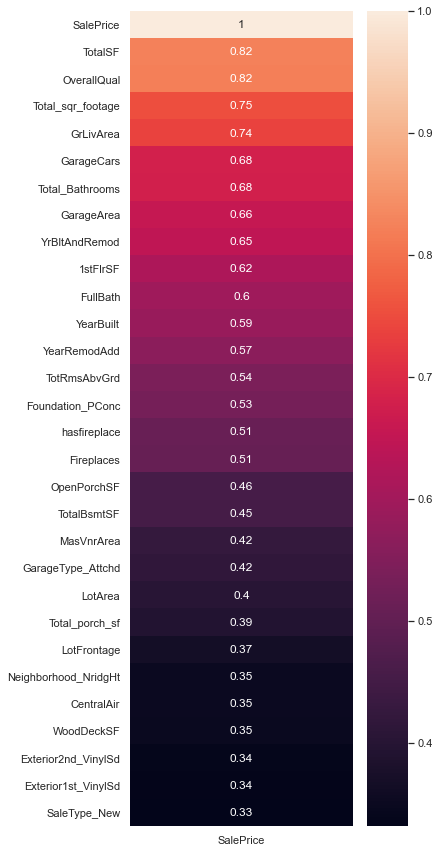

In [69]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                ascending=False).head(30),annot=True)

In [70]:
col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

In [71]:
# 상관성이 큰 변수들을 38개

best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

38


In [73]:
# 모델링 과정에서 필요없는 변수인 Id와 타겟변수를 드롭

new_train = new_train.drop(['SalePrice'], axis=1)
new_train = new_train.drop(['Id'], axis=1)
new_test = new_test.drop(['Id'], axis=1)

KeyError: "['SalePrice'] not found in axis"

In [74]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

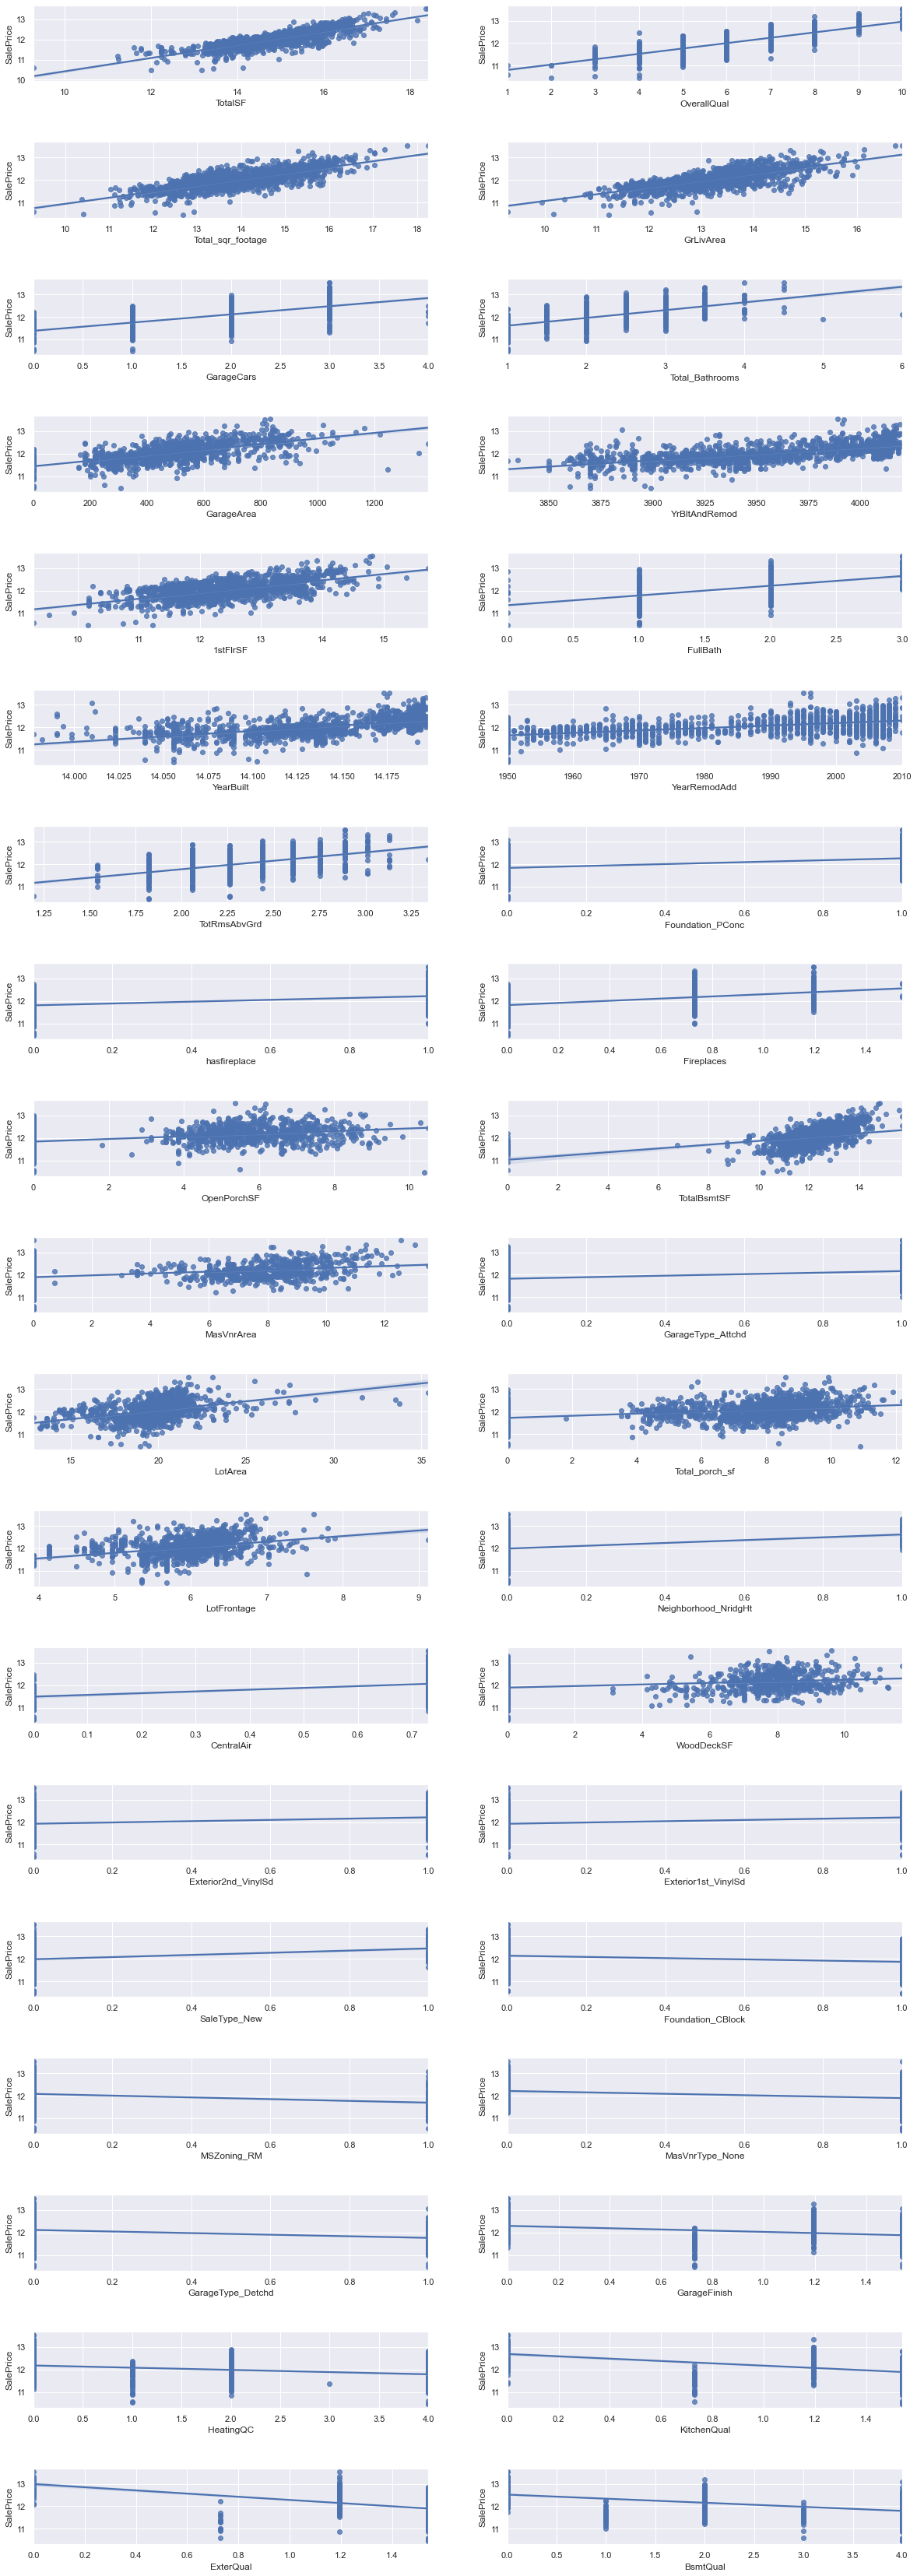

In [76]:
# 상관성이 큰 변수들을 확인하여 regplot을 확인한뒤에 이상치 데이터를 처리하면 모델링 성능을 더 높일수 있을것으로 보임

row = 19
col = 2

fig, axs = plt.subplots(row,col, figsize = (20,60))
fig.subplots_adjust(hspace=0.8)

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]],target,fit_reg=True,marker='o', ax = axs[r][c])

### 모델링

In [79]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

### 스케일링

스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.

- StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.

- RobustScaler(X): 중앙값(median)이 0,IQR(interquartile range)이 1이 되도록 변환.

- MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

- MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변

In [80]:
from sklearn.preprocessing import RobustScaler

rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [81]:
# statsmodels 패키지: 검정 및 추정(test and estimation), 회귀분석(regression analysis), 시계열분석(time-series analysis) 등 다양한 통계분석 기능을 제공하는 파이썬 패키지다.

import statsmodels.api as sm

# OLS(Oridinary Least Square): 선형회귀분석

가장 기본적인 결정론적 회귀 방법으로 잔차제곱합을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다. 

즉 가장 적합한 회귀계수 추정치를 찾음으로써 가장 적합한 회귀직선을 추정하는 것이다. 

단 선형성이 만족, 등분산성 검토(잔차제곡합이 최소가 되게 하는 직선이 자료의 선형적인 관계를 가장 잘 표현하는 직선)이라는 두 가정을 만족해야 한다. 

In [82]:
model = sm.OLS(target.values, new_train)

In [83]:
re = model.fit()

In [84]:
# 모델의 설명력이 1로 굉장히 높지만 변수들중 P-value가 높은 값들이 존재하며 다중공선성의 문제 있을수도 있음

re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     104.6
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:08:27   Log-Likelihood:                 1389.0
No. Observations:                1458   AIC:                            -2362.
Df Residuals:                    1250   BIC:                            -1263.
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0013      0.003     -0.376      0.707      -0.008       0.005
LotFrontage               0.0085      0.008      1.036      0.301      -0.008       0.025
LotArea                   0.0225      0.003      8.331      0.000       0.017       0.028
Street                    0.1257      0.069      1.815      0.070      -0.010       0.262
Alley                     0.0153      0.021      0.726      0.468      -0.026       0.057
LotShape                  0.0055      0.005      1.206      0.228      -0.003       0.014
LandSlope                 0.0228      0.021      1.061      0.289      -0.019       0.065
OverallQual               0.0414      0.004      9.369      0.000       0.033       0.050
OverallCond               0.1670      0.015     10.942      0.000       0.137       0.197
YearBuilt               -14.4624     18.658     -0.775      0.438     -51.066      22.141
YearRemodAdd             -0.0242      0.030     -0.807      0.420      -0.083       0.035
MasVnrArea                0.0010      0.003      0.389      0.697      -0.004       0.006
ExterQual                -0.0237      0.014     -1.659      0.097      -0.052       0.004
ExterCond                 0.0079      0.013      0.611      0.541      -0.018       0.033
BsmtQual                 -0.0083      0.004     -2.220      0.027      -0.016      -0.001
BsmtCond                  0.0106      0.008      1.321      0.187      -0.005       0.026
BsmtExposure             -0.0055      0.006     -0.875      0.382      -0.018       0.007
BsmtFinType1             -0.0014      0.002     -0.614      0.539      -0.006       0.003
BsmtFinSF1                0.0001      0.002      0.064      0.949      -0.004       0.004
BsmtFinType2             -0.0119      0.013     -0.942      0.347      -0.037       0.013
BsmtFinSF2               -0.0041      0.002     -2.261      0.024      -0.008      -0.001
BsmtUnfSF                -0.0008      0.002     -0.410      0.682      -0.004       0.003
TotalBsmtSF               0.0105      0.020      0.535      0.593      -0.028       0.049
HeatingQC                -0.0075      0.002     -3.455      0.001      -0.012      -0.003
CentralAir                0.0689      0.023      2.981      0.003       0.024       0.114
1stFlrSF                  0.0208      0.020      1.027      0.304      -0.019       0.061
2ndFlrSF                  0.0283      0.010      2.800      0.005       0.008       0.048
LowQualFinSF              0.0027      0.004      0.631      0.528      -0.006       0.011
GrLivArea                 0.0125      0.039      0.323      0.747      -0.063       0.088
BsmtFullBath             -0.0851      0.106     -0.806      0.420      -0.292       0.122
BsmtHalfBath             -0.0487      0.056     -0.865      0.387      -0.159       0.062
FullBath               

## 다중공선성과 변수 선택

다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다.다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가한다.
함수의 조건수(condition number)는 argument에서의 작은 변화의 비율에 대해 함수가 얼마나 변화할 수 있는지 에 대한 argument measure이다.

회귀분석에서 조건수가 커지는 경우는 크게 두 가지가 있다.

1) 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.

2) 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.


##  VIF(Variance Inflation Factor)

다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 그 중 VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸다. 여기에서  R2i 는 다른 변수로  i 번째 변수를 선형회귀한 성능(결정 계수)이다. 다른 변수에 의존적일 수록 VIF가 커진다.

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = new_train.columns
vif['vif'] = [variance_inflation_factor(
    new_train.values, i) for i in range(new_train.shape[1])]

In [86]:
# vif가 10 이상이면 다중공선성이 존재한다고 하는데 많은 변수들이 다중공선성 문제 존재
# 해결 방안으로는다중공선성에 robust한 트리모델을 사용하는 방법
# 변수제거 및 FE, 변환등을 통한 대체
# 관측값을 늘려 표본의 크기를 증가가 있다. 
# 주어진 데이터로 인하여 표본의 크기를 증가할 수 없기 때문에 robust한 트리모델을 사용하는 방법을 택하였습니다.

vif.sort_values(by='vif',ascending=False)[165:190]

,Features,vif
40,GarageYrBlt,44201.767159
63,haspool,3375.516181
52,PoolArea,3114.411164
61,Total_Bathrooms,495.719012
26,2ndFlrSF,471.396022
58,TotalSF,318.881940
64,has2ndfloor,311.452414
22,TotalBsmtSF,258.905595
31,FullBath,249.237321
29,BsmtFullBath,217.805638


### Robust : 중앙값(median)과 IQR(interquartile range) 사용. 

아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

IQR = Q3 - Q1 : 즉, 25퍼센타일과 75퍼센타일의 값들을 다룬다.


In [87]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [88]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

### 교차검증

scikit-learn의 train_test_split()함수를 사용하여 데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 성능이 좋은 평가방법은 교차 검증(Cross Validation)이다. K-겹 교차검증에서 K에는 5 or 10과 같은 특정 숫자가 들어가며 데이터를 비슷한 크기의 집합 'K개'로 나눈다. 이를 폴드(fold)라고 한다.

(1) 단순 교차검증 cross_val_score

사이킷런에서는 교차검증을 위해 cross_val-score 함수를 제공한다. cross_val_score에 들어가는 매개변수는 (모델 명, 훈련데이터, 타깃, cv)인데, 여기에서 cv는 폴드(fold)수를 의미한다. 

(2) 계층별 k-겹 교차검증

데이터가 편항되어 있을 경우(몰려있을 경우) 단순 k-겹 교차검증을 사용하면 성능 평가가 잘 되지 않을 수 있다. 따라서 이럴 땐 stratified k-fold cross-validation을 사용한다.

StratifiedKFold함수는 매개변수로 n_splits, shuffle, random_state를 가진다.

n_splits은 몇 개로 분할할지를 정하는 매개변수이고, shuffle의 기본값 False 대신 True를 넣으면 Fold를 나누기 전에 무작위로 섞는다. 그 후, cross_val_score함수의 cv 매개변수에 넣으면 된다.

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

#### Hyper-Parameters Tuning
알고리즘 학습 속도를 변경하고 더 나은 모델을 얻도록 조정하는데, 이것을 하이퍼 파라미터 튜닝이라고 한다.

#### GridSearch
GridSearch 는 우리가 지정해준 몇 가지 잠재적 Parameter들의 후보군들의 조합 중에서 가장 Best 조합을 찾아준다. 하나하나 대입해 가면서 loss를 확인하는 작업을 GridSearch는 대신 해준다고 보면 된다. 또한, sklearn 패키지에서 제공해주고 있기때문에 매우 손쉽게 사용할 수 있다.

하지만, 가장 큰 단점은 지정해 준 hyperparameter 후보군의 갯수만큼 비례하여 시간이 늘어기 때문에 최적의 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있다.

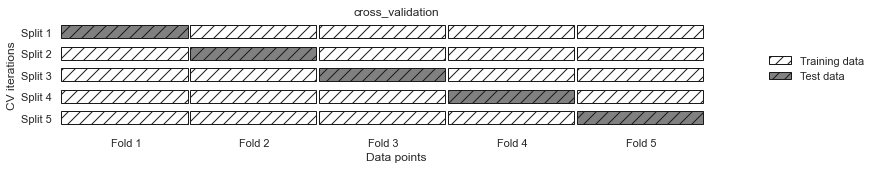

In [99]:
# k=5일 때, 즉 데이터를 5개의 부분 집합으로 분할한 후, 각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 4개의 폴드는 훈련용으로 쓴다. 이 과정을 반복하여 각 분할마다 정확도를 측정한다.

import mglearn
mglearn.plots.plot_cross_validation()

In [89]:
kfold = KFold(n_splits=4)

In [90]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [91]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = target,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [92]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [93]:
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.378693,0.0
1,0.378227,0.0
2,0.136656,0.0
3,0.121699,0.0
4,0.131375,0.0
5,0.128254,0.0


## 2. 부스팅(Boosting)
부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법입니다. 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측합니다. 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식입니다. 하지만 부스팅은 모델 간 팀워크가 이루어집니다. 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 줍니다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복합니다.


#### 부스팅 알고리즘 1. AdaBoost

Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘 속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함

1) base_estimators: 학습에 사용하는 알고리즘

Default = None → DecisionTreeClassifier(max_depth=1)가 적용
2) n_estimatorr: 생성할 약한 학습기의 갯수를 지정

Default = 50
n_estimators를 늘린다면 생성하는 weak learner의 수는 늘어남 이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해짐

3) learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1)

Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
Default = 1.0
위의 두 가지는 trade-off 관계입니다. n_estimators(또는 learning_rate)를 늘리고, learning_rate(또는 n_estimators)을 줄인다면 서로 효과가 상쇄됩니다. 때문에 이 두 파라미터를 잘 조정하는 것이 알고리즘의 핵심.

#### 부스팅 알고리즘 2. Gradient Boost Machine(GBM)

AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘입니다. GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게되고, 시간이 오래 걸린다는 단점이 있습니다.

※ 경사하강법 분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

※ Greedy Algorithm(탐욕 알고리즘) 미래를 생각하지 않고 각 단계에서 가장 최선의 선택을 하는 기법으로 각 단계에서 최선의 선택을 한 것이 전체적으로도 최선이길 바라는 알고리즘입니다. 물론 모든 경우에서 그리디 알고리즘이 통하지는 않습니다. 가령 지금 선택하면 1개의 마시멜로를 받고, 1분 기다렸다 선택하면 2개의 마시멜로를 받는 문제에서는, 그리디 알고리즘을 사용하면 항상 마시멜로를 1개밖에 받지 못합니다. 지금 당장 최선의 선택은 마시멜로 1개를 받는 거지만, 결과적으로는 1분 기다렸다가 2개 받는 게 최선이기 때문입니다.

loss: 경사하강법에서 사용할 cost function 지정 특별한 이유가 없으면 default 값인 deviance 적용

subsample - 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1) default=1 (전체 데이터 학습) 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

#### 부스팅 알고리즘 3. xgboost

GBM의 느리고, 과적함 단점을 보완해주기 위해 나온 알고리즘. xgboost는 GBM보다 빠르고, 과적합 방지가 가능한 규제가 포함되어 있다. CART(Classification And Regression Tree) 를 기반으로 하여 분류와 회귀가 다 가능하다 조기종료를 제공하고, GBM 기반으로 가중치 부여를 겅사하강법으로 한다.

-colsample_bytree: 컬럼의 샘플링 비율 -min_split_loss: 리프 노드를 추가적으로 나눌지 결정하는 값 -reg_lanbda: L2 규제 -reg_alpha: L1 규제

-early_stopping_rounds: 지정한 숫자만큼 돌리는 동안 성능이 좋아지지 않으면, 해당 숫자 전, 평가 기준이 되는 모델을 사용하도록 하고 모델 training을 일찍 종료 -eval set: 조기종료할 때 어떤 데이터를 보고 평가할 것인지 설정

In [94]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   37.3s
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:   55.0s finished


-0.017731829400869203

In [95]:
# XGBoost 파라미터 튜닝 

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(X_rbst,target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 11.5min finished


-0.01401672309328492

In [96]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   57.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 1728 out of 1728 | elapsed: 15.7min finished


-0.018533039905470255

## 앙상블

앙상블 기법에는 다양한 방법이 존재하는데

Voting (투표) - 투표를 통해 결과 도출

Bagging - Bootstrap Aggregating (샘플을 다양하게 중복 생성)

Boosting - 이전 오차를 보완하며 가중치 부여

Stacking- 여러 모델을 기반으로 meta 모델

앙상블 모델을 사용함으로써 성능을 분산시켜 과적합 감소 효과와 개별 모델 성능이 잘 안나올 때 앙상블 학습을 이용하면 성능을 향상시킬수 있다. 앙상블에는 배깅과 부스팅이 스태킹 등 있는데 스태킹은 서로 다른 모델들을 조합해서 최고의 성능을 내는 모델을 생성하는 것이고 위의 5개의 예측값만을 이용해가지고 타겟변수를 예측하는 것이다.average는 모델의 예측값을 평균을 내줌으로서 성능을 향상시키는 것인데 모델의 스코어에 맞추어 가중치를 달리 해주는 방식을 선택하였다.

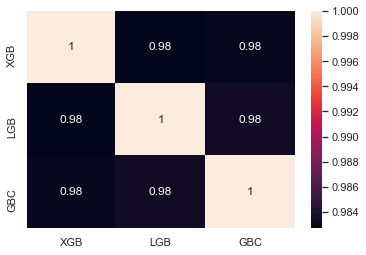

In [100]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name="GBC")
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name="LGB")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [101]:
# 3가지 모델을 heatmap을 통해서 상관관계를 비교해보고 상관성이 높은 XGB와 GBC 모델을 이용하여 앙상블 모델을 만들어서 결과를 제출

ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_XGB + 0.1*test_Survived_LGB)
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": ensemble
})
submission.head()

,Id,SalePrice
0,1461,124153.186281
1,1462,163133.115118
2,1463,181864.857840
3,1464,197451.501460
4,1465,194449.182760
